<a href="https://colab.research.google.com/github/cysorianoc/IBM_Data_Science/blob/main/Course_4_W5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Practice Project: GDP Data extraction and processing

Estimated time needed: **30** minutes

## Introduction

In this practice project, you will put the skills acquired through the course to use. You will extract data from a website using webscraping and reqeust APIs process it using Pandas and Numpy libraries.


## Project Scenario:

An international firm that is looking to expand its business in different countries across the world has recruited you. You have been hired as a junior Data Engineer and are tasked with creating a script that can extract the list of the top 10 largest economies of the world in descending order of their GDPs in Billion USD (rounded to 2 decimal places), as logged by the International Monetary Fund (IMF).

The required data seems to be available on the URL mentioned below:


URL: https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29


## Objectives

After completing this lab you will be able to:

 - Use Webscraping to extract required information from a website.
 - Use Pandas to load and process the tabular data as a dataframe.
 - Use Numpy to manipulate the information contatined in the dataframe.
 - Load the updated dataframe to CSV file.


---


## Dislcaimer

If you are using a downloaded version of this notebook on your local machine, you may encounter a warning message as shown in the screenshot below.

<p style="text-align:center">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/mod_5/practice_project_disclaimer.png" width="700" alt="warning message">
</p>


This does not affect the execution of your codes in any way and can be simply ignored.


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [82]:
import numpy as np
import pandas as pd

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

---


# Exercises

### Exercise 1
Extract the required GDP data from the given URL using Web Scraping.


In [ ]:
URL="https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"

You can use Pandas library to extract the required table directly as a DataFrame. Note that the required table is the third one on the website, as shown in the image below.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/images/pandas_wbs_3.png">


In [ ]:
# Extract tables from webpage using Pandas. Retain table number 3 as the required dataframe.
tables=pd.read_html(URL)
# Note: tables is a list of all the tables on the page.
df=tables[3]

# Replace the column headers with column numbers
df.columns = range(df.shape[1])
# Note: df.shape[0] refers to the number of rows and df.shape[1] refers to the number of columns


# Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
df=df[[0,2]]

# Retain the Rows with index 1 to 10, indicating the top 10 economies of the world.
df=df.iloc[1:11,:]



# Assign column names as "Country" and "GDP (Million USD)"
df.columns = ['Country','GDP (Million USD)']

In [ ]:
df

,Country,GDP (Million USD)
1,United States,26854599
2,China,19373586
3,Japan,4409738
4,Germany,4308854
5,India,3736882
6,United Kingdom,3158938
7,France,2923489
8,Italy,2169745
9,Canada,2089672
10,Brazil,2081235


<details>
    <summary>Click here for Solution</summary>

```python
# Extract tables from webpage using Pandas. Retain table number 3 as the required dataframe.
tables = pd.read_html(URL)
df = tables[3]

# Replace the column headers with column numbers
df.columns = range(df.shape[1])

# Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
df = df[[0,2]]

# Retain the Rows with index 1 to 10, indicating the top 10 economies of the world.
df = df.iloc[1:11,:]

# Assign column names as "Country" and "GDP (Million USD)"
df.columns = ['Country','GDP (Million USD)']
```

</details>


### Exercise 2
Modify the GDP column of the DataFrame, converting the value available in Million USD to Billion USD. Use the `round()` method of Numpy library to round the value to 2 decimal places. Modify the header of the DataFrame to `GDP (Billion USD)`.


In [ ]:
# Change the data type of the 'GDP (Million USD)' column to integer. Use astype() method.
df['GDP (Million USD)']=df['GDP (Million USD)'].astype(int)

# Convert the GDP value in Million USD to Billion USD
df[['GDP (Million USD)']]=df[['GDP (Million USD)']]/1000


# Use numpy.round() method to round the value to 2 decimal places.
df[['GDP (Million USD)']]=np.round(df[['GDP (Million USD)']],2)

# Rename the column header from 'GDP (Million USD)' to 'GDP (Billion USD)'
df.columns = ['Country','GDP (Billion USD)']

<details>
    <summary>Click here for solution</summary>
    
```python
# Change the data type of the 'GDP (Million USD)' column to integer. Use astype() method.
df['GDP (Million USD)'] = df['GDP (Million USD)'].astype(int)

# Convert the GDP value in Million USD to Billion USD
df[['GDP (Million USD)']] = df[['GDP (Million USD)']]/1000

# Use numpy.round() method to round the value to 2 decimal places.
df[['GDP (Million USD)']] = np.round(df[['GDP (Million USD)']], 2)

# Rename the column header from 'GDP (Million USD)' to 'GDP (Billion USD)'
df.rename(columns = {'GDP (Million USD)' : 'GDP (Billion USD)'})

```
</details>


### Exercise 3


Load the DataFrame to the CSV file named "Largest_economies.csv"


In [ ]:
df.to_csv('Largest_economies.csv')


<details>
    <summary>Click here for Solution</summary>

```python
# Load the DataFrame to the CSV file named "Largest_economies.csv"
df.to_csv('./Largest_economies.csv')
```

</details>


---


# Congratulations! You have completed the lab.


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-11-10|0.1|Abhishek Gagneja|Created initial version|


Copyright © 2023 IBM Corporation. All rights reserved.


## Another example of web scrapping

For that, I will extract data formatted in .txt of Cone Penetration Tests https://www.geoengineer.org/education/site-characterization-in-situ-testing-general/cone-penetration-testing-cpt

Employed as field tests for soil characterization tests and to obtain several parameters of soil shear strength by means of correlations.

The source is the USGS website: https://earthquake.usgs.gov/research/cpt/data/imperial/table/




In [83]:
# Step 1: import Pandas
import pandas as pd

# Step 2: put the URL of the data
url = "https://earthquake.usgs.gov/research/cpt/data/txt/SCC136.txt"

# Step 3: extract the data and ocnvert it into a dataframe
# The original file has several lines which provide the metadata, include the location, date, and so on.
# For this example we will skip them.
# Using delimiter '\t' for more accurate splitting based on the tab-separated values
df = pd.read_csv(url, skiprows=18, delimiter='\t', header=None)


# Step3:  Manually setting the column names
df.columns = ['Depth (m)', 'Tip Resistance (MN/m2)', 'Sleeve Friction (kN/m2)', 'Inclination (degree)', 'S-wave travel time (ms)']
# there are fields with N/A so we will replace them by zero
df.fillna(0, inplace=True)
# Displaying the resulting DataFrame
df.head()
# Add a calculation to the Dataframe to obtain the friction ratio RF
Rf = (df['Sleeve Friction (kN/m2)']/(df['Tip Resistance (MN/m2)']*1000)) * 100
df.insert(3, "Friction Ratio [%]", Rf, True)
df.head()

,Depth (m),Tip Resistance (MN/m2),Sleeve Friction (kN/m2),Friction Ratio [%],Inclination (degree),S-wave travel time (ms)
0,0.4,4.90,169.93,3.467959,0.0,0.0
1,0.6,4.51,117.65,2.608647,0.0,0.0
2,0.8,2.94,91.50,3.112245,0.0,0.0
3,1.0,2.16,65.36,3.025926,0.0,0.0
4,1.2,1.96,39.22,2.001020,0.0,0.0


### Now, let's explore some plots, for instance the tip resistance vs depth and the sleeve resistance with depth.

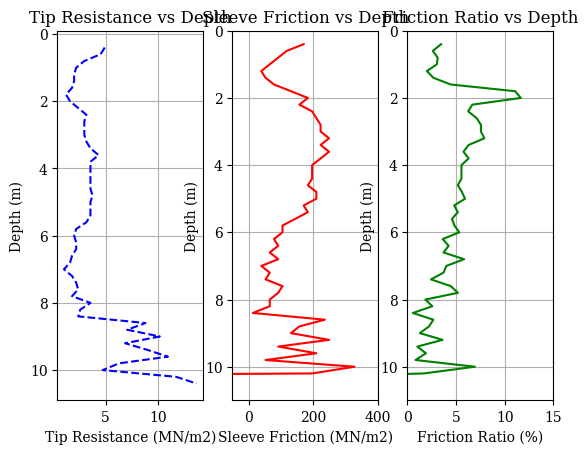

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

# Disable LaTeX rendering and specify a different serif font
# Disable LaTeX rendering and specify a recognized serif font
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'  # Use a recognized serif font


# We can plot together the tip resistance and sleeve friction
# From the alternatives I find this one simple and is similar to Matlab subplots
plt.subplot(131)
plt.plot( df['Tip Resistance (MN/m2)'],df['Depth (m)'], linestyle='--', color='b')
plt.ylabel('Depth (m)')
plt.xlabel('Tip Resistance (MN/m2)')
plt.title('Tip Resistance vs Depth')
plt.gca().invert_yaxis()
plt.grid(True)

plt.subplot(132)
plt.plot( df['Sleeve Friction (kN/m2)'],df['Depth (m)'], linestyle='-', color='r')
plt.xlim(-50, 400)
plt.ylim(0, 11)
plt.ylabel('Depth (m)')
plt.xlabel('Sleeve Friction (MN/m2)')
plt.title('Sleeve Friction vs Depth')
plt.gca().invert_yaxis()
plt.grid(True)

plt.subplot(133)
plt.plot( df['Friction Ratio [%]'],df['Depth (m)'], linestyle='-', color='g')
plt.xlim(0, 15)
plt.ylim(0, 11)
plt.ylabel('Depth (m)')
plt.xlabel('Friction Ratio (%)')
plt.title('Friction Ratio vs Depth')
plt.gca().invert_yaxis()
plt.grid(True)

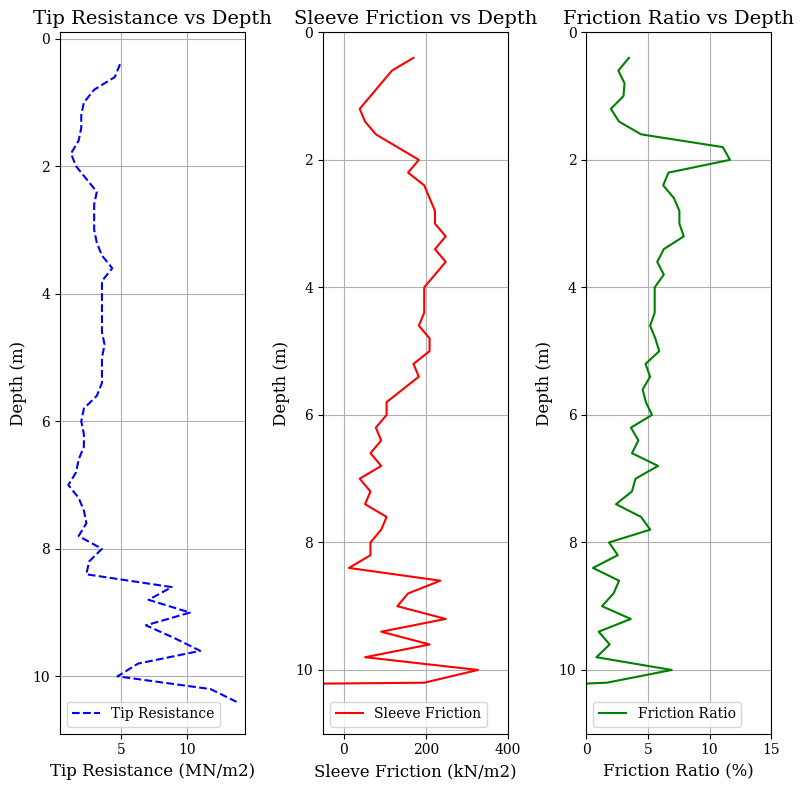

In [94]:
# Set figure size and layout
plt.figure(figsize=(8, 8))

# Disable LaTeX rendering and specify a recognized serif font
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'  # Use a recognized serif font


# Plot 1: Tip Resistance vs Depth
plt.subplot(131)
plt.plot(df['Tip Resistance (MN/m2)'], df['Depth (m)'], linestyle='--', color='b', label='Tip Resistance')
plt.xlabel('Tip Resistance (MN/m2)', fontsize=12)
plt.ylabel('Depth (m)', fontsize=12)
plt.title('Tip Resistance vs Depth', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()

# Plot 2: Sleeve Friction vs Depth
plt.subplot(132)
plt.plot(df['Sleeve Friction (kN/m2)'], df['Depth (m)'], linestyle='-', color='r', label='Sleeve Friction')
plt.xlim(-50, 400)
plt.ylim(0, 11)
plt.xlabel('Sleeve Friction (kN/m2)', fontsize=12)
plt.ylabel('Depth (m)', fontsize=12)
plt.title('Sleeve Friction vs Depth', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()

# Plot 3: Friction Ratio vs Depth
plt.subplot(133)
plt.plot(df['Friction Ratio [%]'], df['Depth (m)'], linestyle='-', color='g', label='Friction Ratio')
plt.xlim(0, 15)
plt.ylim(0, 11)
plt.xlabel('Friction Ratio (%)', fontsize=12)
plt.ylabel('Depth (m)', fontsize=12)
plt.title('Friction Ratio vs Depth', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('professional_plot.png', dpi=300)

# Show the plot
plt.show()